In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from profilehooks import profile, timecall
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [2]:
df = pd.read_csv('../cleaned_data.csv', index_col=0)

In [3]:
df.head()

,target,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,p,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,e,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,e,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,p,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,e,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [4]:
X = df.drop('target', axis=1)

In [5]:
y = df['target']

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [7]:
knn_model = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree')

In [8]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [14]:
@profile(immediate=True)
def predict_model():
    return knn_model.predict(X_test)

In [15]:
y_pred = predict_model()


*** PROFILER RESULTS ***
predict_model (<ipython-input-14-d6c379dc2b01>:1)
function called 1 times

         896 function calls (875 primitive calls) in 2.543 seconds

   Ordered by: cumulative time, internal time, call count
   List reduced from 229 to 40 due to restriction <40>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    2.543    2.543 <ipython-input-14-d6c379dc2b01>:1(predict_model)
        1    0.000    0.000    2.543    2.543 classification.py:133(predict)
        1    0.001    0.001    2.531    2.531 base.py:323(kneighbors)
        1    0.001    0.001    2.527    2.527 parallel.py:932(__call__)
        2    0.000    0.000    2.525    1.262 parallel.py:801(dispatch_one_batch)
        1    0.000    0.000    2.523    2.523 parallel.py:764(_dispatch)
        1    0.000    0.000    2.523    2.523 _parallel_backends.py:180(apply_async)
        1    0.000    0.000    2.523    2.523 _parallel_backends.py:542(__init__)
        1

In [11]:
cv_scores = []

for k in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

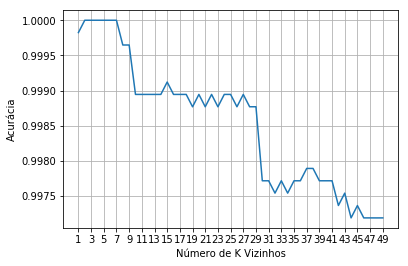

In [12]:
plt.plot(range(1,50), cv_scores)
plt.xlabel('Número de K Vizinhos')
plt.ylabel('Acurácia')
plt.xticks(np.arange(1,50,2))
plt.grid()
plt.show()

In [16]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))

[[1256    0]
 [   0 1182]]
              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1256
           p       1.00      1.00      1.00      1182

   micro avg       1.00      1.00      1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

